In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn

In [2]:
Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

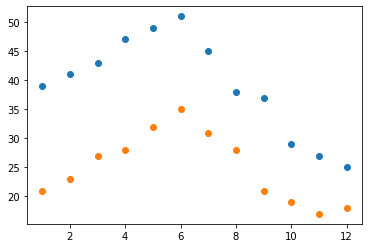

In [4]:
X=np.array(Max)
Y=np.array(Min)
month=np.arange(1,13)
plt.plot(month,X,'o')
plt.plot(month,Y,'o')

In [5]:
from scipy.optimize import curve_fit
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 1.8 * np.pi / times.max()))
r_max,pcov=curve_fit(yearly_temps,month,Max,[20,20,0])
r_min,pcov=curve_fit(yearly_temps,month,Min,[-20,20,0])

Text(0, 0.5, 'max and min temeprature')

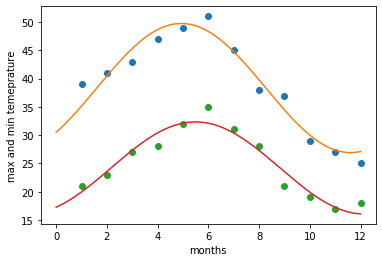

In [6]:
days=np.linspace(0,12,365)
plt.plot(month,X,'o')
plt.plot(days,yearly_temps(days,*r_max))
plt.plot(month,Y,'o')
plt.plot(days,yearly_temps(days,*r_min))
plt.xlabel('months')
plt.ylabel('max and min temeprature')


In [7]:
url='https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
df=pd.read_csv(url)
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0000,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN


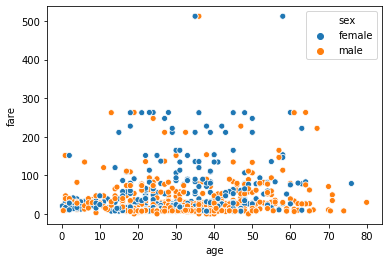

In [9]:
sn.scatterplot(x='age',y='fare',data=df,hue='sex')

([<matplotlib.patches.Wedge at 0x230e6e0e888>,
 [Text(-0.48083677220945115, 0.9893411941747885, 'male'),
  Text(0.48083667958064136, -0.9893412391939719, 'female')],
 [Text(-0.262274603023337, 0.5396406513680664, '64.40'),
  Text(0.26227455249853165, -0.5396406759239846, '35.60')])

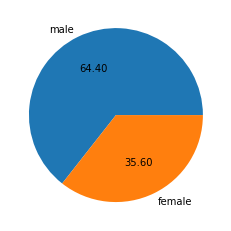

In [8]:
a,b=df['sex'].value_counts()*100/len(df['sex'])
c=[a,b]
name=['male','female']
fig1,ax1=plt.subplots()
ax1.pie(c,labels=name,autopct='%.2f')